In [23]:
import pandas as pd
import numpy as np
import nltk
from sklearn.model_selection import train_test_split
import string
from gensim.parsing.preprocessing import remove_stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package punkt to C:\Users\Rao
[nltk_data]     Sharjeel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Rao
[nltk_data]     Sharjeel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Rao
[nltk_data]     Sharjeel\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
df=pd.read_csv('spam.csv', encoding = "ISO-8859-1")
df=df.iloc[:,0:2]
df.columns=['target','text']
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<AxesSubplot:xlabel='target', ylabel='count'>

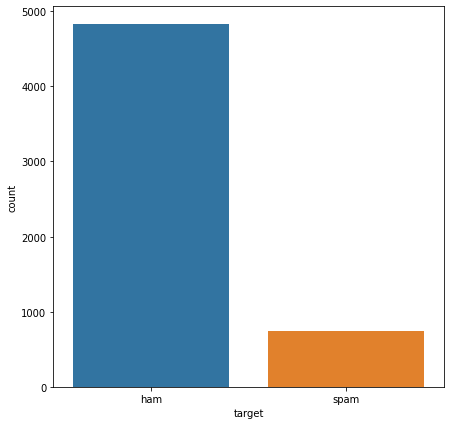

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,7))
sns.countplot(data=df,
              x=df.target)

In [5]:
df.target=df.target.replace({'ham':0,'spam':1})

In [6]:
import nltk
import re
import string
from nltk.tokenize import word_tokenize

In [7]:
df['tokenized_text']=df['text'].apply(lambda x: word_tokenize(x))
df.head()

,target,text,tokenized_text
0,0,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail..."
1,0,Ok lar... Joking wif u oni...,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,0,U dun say so early hor... U c already then say...,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,0,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, do, n't, think, he, goes, to, usf, ,,..."


In [8]:
punc='!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~...'
def remove_punc (dataframe):
    dataframe=list(c for c in dataframe if c not in punc)
    return dataframe   
df['clean_token']=df['tokenized_text'].apply(lambda x: remove_punc(x))
df.head()

,target,text,tokenized_text,clean_token
0,0,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail...","[Go, until, jurong, point, crazy, Available, o..."
1,0,Ok lar... Joking wif u oni...,"[Ok, lar, ..., Joking, wif, u, oni, ...]","[Ok, lar, Joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,0,U dun say so early hor... U c already then say...,"[U, dun, say, so, early, hor, ..., U, c, alrea...","[U, dun, say, so, early, hor, U, c, already, t..."
4,0,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, do, n't, think, he, goes, to, usf, ,,...","[Nah, I, do, n't, think, he, goes, to, usf, he..."


In [9]:
stopwords=nltk.corpus.stopwords.words('english')
def remove_sw (dataframe):
    dataframe=list(c for c in dataframe if c not in stopwords)
    return dataframe 
df['clean_token_sw']=df['clean_token'].apply(lambda x: remove_sw(x))
df.head()

,target,text,tokenized_text,clean_token,clean_token_sw
0,0,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail...","[Go, until, jurong, point, crazy, Available, o...","[Go, jurong, point, crazy, Available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,"[Ok, lar, ..., Joking, wif, u, oni, ...]","[Ok, lar, Joking, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,0,U dun say so early hor... U c already then say...,"[U, dun, say, so, early, hor, ..., U, c, alrea...","[U, dun, say, so, early, hor, U, c, already, t...","[U, dun, say, early, hor, U, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, do, n't, think, he, goes, to, usf, ,,...","[Nah, I, do, n't, think, he, goes, to, usf, he...","[Nah, I, n't, think, goes, usf, lives, around,..."


In [10]:
wn=nltk.WordNetLemmatizer()
def lam (dataframe):
    dataframe=list(wn.lemmatize(c) for c in dataframe)
    return dataframe 
df['clean_token_lm']=df['clean_token_sw'].apply(lambda x: lam(x))
df.head()

,target,text,tokenized_text,clean_token,clean_token_sw,clean_token_lm
0,0,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail...","[Go, until, jurong, point, crazy, Available, o...","[Go, jurong, point, crazy, Available, bugis, n...","[Go, jurong, point, crazy, Available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,"[Ok, lar, ..., Joking, wif, u, oni, ...]","[Ok, lar, Joking, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,0,U dun say so early hor... U c already then say...,"[U, dun, say, so, early, hor, ..., U, c, alrea...","[U, dun, say, so, early, hor, U, c, already, t...","[U, dun, say, early, hor, U, c, already, say]","[U, dun, say, early, hor, U, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, do, n't, think, he, goes, to, usf, ,,...","[Nah, I, do, n't, think, he, goes, to, usf, he...","[Nah, I, n't, think, goes, usf, lives, around,...","[Nah, I, n't, think, go, usf, life, around, th..."


In [11]:
def low (dataframe):
    dataframe=list(c.lower() for c in dataframe )
    return dataframe 
df['lower']=df['clean_token_lm'].apply(lambda x: low(x))
df.head()

,target,text,tokenized_text,clean_token,clean_token_sw,clean_token_lm,lower
0,0,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail...","[Go, until, jurong, point, crazy, Available, o...","[Go, jurong, point, crazy, Available, bugis, n...","[Go, jurong, point, crazy, Available, bugis, n...","[go, jurong, point, crazy, available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,"[Ok, lar, ..., Joking, wif, u, oni, ...]","[Ok, lar, Joking, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,"[U, dun, say, so, early, hor, ..., U, c, alrea...","[U, dun, say, so, early, hor, U, c, already, t...","[U, dun, say, early, hor, U, c, already, say]","[U, dun, say, early, hor, U, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, do, n't, think, he, goes, to, usf, ,,...","[Nah, I, do, n't, think, he, goes, to, usf, he...","[Nah, I, n't, think, goes, usf, lives, around,...","[Nah, I, n't, think, go, usf, life, around, th...","[nah, i, n't, think, go, usf, life, around, th..."


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy.sparse

tfidf2=TfidfVectorizer()
x=tfidf2.fit_transform((df['lower']).astype(str))
df_f=pd.DataFrame.sparse.from_spmatrix(x)
df_f.columns=tfidf2.get_feature_names()
df_f.head()

C:\Users\Rao Sharjeel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,åè10,åð,åòharry,åòit,åômorrow,åôrents,ì_,ì¼1,ìä,ìï
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
y=df.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [14]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [15]:
y_pred=model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9447236180904522

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1199,    3],
       [  74,  117]], dtype=int64)

In [28]:
def transform(text):
  text=text.lower()
  text = text.translate(str.maketrans('', '', string.punctuation))
  text = remove_stopwords(text)
  text=word_tokenize(text)
  ps = PorterStemmer()
  new=[]
  for ele in range(len(text)):
    new.append(ps.stem(text[ele]))
  text=new
  text=" ".join(text)
  return print(text)

In [30]:
text='How are moddi you buddy?'
tnf=transform(text)
tnf

moddi buddi


In [33]:
tfidf2.transform(tnf.astype(str))

AttributeError: 'NoneType' object has no attribute 'astype'

In [32]:
type(tnf)

NoneType